In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model

In [2]:
df = pd.read_csv(r'/Users/anniekim/Documents/SEER Breast Cancer Dataset .csv',index_col=False)
df.head(5)

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [3]:
df = df[['Age','T Stage ','N Stage','6th Stage', 'Grade', 'A Stage','Tumor Size','Status']]
df.head(5)

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Status
0,43,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Alive
1,47,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Alive
2,67,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Dead
3,46,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Dead
4,63,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Dead


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         4024 non-null   int64 
 1   T Stage     4024 non-null   object
 2   N Stage     4024 non-null   object
 3   6th Stage   4024 non-null   object
 4   Grade       4024 non-null   object
 5   A Stage     4024 non-null   object
 6   Tumor Size  4024 non-null   int64 
 7   Status      4024 non-null   object
dtypes: int64(2), object(6)
memory usage: 251.6+ KB


In [5]:
df.isnull().sum()

Age           0
T Stage       0
N Stage       0
6th Stage     0
Grade         0
A Stage       0
Tumor Size    0
Status        0
dtype: int64

In [6]:
print ("The df data has",df.shape)

The df data has (4024, 8)


In [7]:
from sklearn import preprocessing

for x in df.columns:
    if df[x].dtype == 'object':df.info()
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df[x].values))
    df[x] = lbl.transform(list(df[x].values))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         4024 non-null   int64 
 1   T Stage     4024 non-null   object
 2   N Stage     4024 non-null   object
 3   6th Stage   4024 non-null   object
 4   Grade       4024 non-null   object
 5   A Stage     4024 non-null   object
 6   Tumor Size  4024 non-null   int64 
 7   Status      4024 non-null   object
dtypes: int64(2), object(6)
memory usage: 251.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         4024 non-null   int64 
 1   T Stage     4024 non-null   int64 
 2   N Stage     4024 non-null   object
 3   6th Stage   4024 non-null   object
 4   Grade       4024 non-null   object
 5   A Stage     4024 non-null   object
 6   Tumor Size 

In [8]:
df.head(5)

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Status
0,13,1,2,4,0,1,39,0
1,17,1,1,2,0,1,44,0
2,37,1,0,1,1,1,24,1
3,16,0,0,0,0,1,18,1
4,33,1,1,2,0,1,34,1


In [9]:
df.describe()

,Age,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,23.972167,0.784791,0.438370,1.321819,0.690358,0.977137,29.226392,0.153082
std,8.963134,0.765531,0.693479,1.266624,1.016418,0.149485,20.207811,0.360111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
50%,24.000000,1.000000,0.000000,1.000000,0.000000,1.000000,24.000000,0.000000
75%,31.000000,1.000000,1.000000,2.000000,1.000000,1.000000,37.000000,0.000000
max,39.000000,3.000000,2.000000,4.000000,3.000000,1.000000,109.000000,1.000000


In [10]:
df.columns

Index(['Age', 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage',
       'Tumor Size', 'Status'],
      dtype='object')

/Users/anniekim/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Status', ylabel='count'>

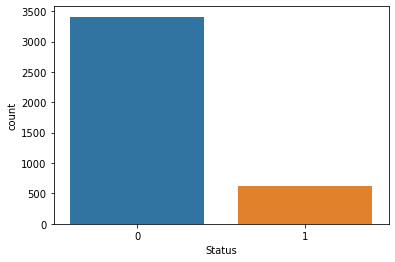

In [11]:
sns.countplot(df['Status'])

In [13]:
from sklearn.model_selection import train_test_split 
X = df[['Age','T Stage ','N Stage','6th Stage', 'Grade', 'A Stage','Tumor Size']]
Y = df[['Status']]
X_train , X_test , y_train , y_test  = train_test_split(X, Y, random_state=0)

In [14]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3018, 7)
y_train shape: (3018, 1)
X_test shape: (1006, 7)
y_test shape: (1006, 1)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test))) 

/Users/anniekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy on training set: 0.854
Accuracy on test set: 0.842


In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format (tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format (tree.score(X_test, y_test)))

Accuracy on training set: 0.849
Accuracy on test set: 0.845


In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 500, max_depth = 6)
clf.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format (clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format (clf.score(X_test, y_test)))

/var/folders/5n/4pqn1_ts06gcgtl_n1ljbxtc0000gn/T/ipykernel_14984/1287922142.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


Accuracy on training set: 0.858
Accuracy on test set: 0.855


In [18]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format (svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format (svm.score(X_test, y_test)))

/Users/anniekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Accuracy on training set: 0.844
Accuracy on test set: 0.855


In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format (lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format (lr.score(X_test, y_test)))

Accuracy on training set: 0.845
Accuracy on test set: 0.856


/Users/anniekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anniekim/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
KNN = knn.score(X_test, y_test)
DT = tree.score(X_test, y_test)
RF = clf.score(X_test, y_test)
SVM = svm.score(X_test, y_test)
LR = lr.score(X_test, y_test)
data = [["KNN classifier", KNN],["Decision Tree", DT],["Random Forest",RF],["Sector Vector Machine",SVM],["Logistic Regression",LR]]
df = pd.DataFrame(data, columns = ['Machine Learning','Accuracy'])
print(df)

        Machine Learning  Accuracy
0         KNN classifier  0.841948
1          Decision Tree  0.844930
2          Random Forest  0.854871
3  Sector Vector Machine  0.854871
4    Logistic Regression  0.855865


In [21]:
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm, 
            columns = ['Actual Positive', 'Actual Negative'],
            index = ['Predicted Positive', 'Predicted Negative'])
print("Logistic Regression Analysis")
print(cm)
print(" ")
print(" ")
cm = confusion_matrix(y_test, y_pred)
total1=sum(sum(cm))
accuracy1=(cm[0,0]+cm[1,1])/total1
print ('Accuracy : ', accuracy1)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)
print(" ")
print(" ")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Logistic Regression Analysis
                    Actual Positive  Actual Negative
Predicted Positive              857                3
Predicted Negative              142                4
 
 
Accuracy :  0.8558648111332008
Sensitivity :  0.9965116279069768
Specificity :  0.0273972602739726
 
 
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       860
           1       0.57      0.03      0.05       146

    accuracy                           0.86      1006
   macro avg       0.71      0.51      0.49      1006
weighted avg       0.82      0.86      0.80      1006



In [23]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.399185
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                 3018
Model:                          Logit   Df Residuals:                     3010
Method:                           MLE   Df Model:                            7
Date:                Tue, 01 Nov 2022   Pseudo R-squ.:                 0.07708
Time:                        18:11:57   Log-Likelihood:                -1204.7
converged:                       True   LL-Null:                       -1305.4
Covariance Type:            nonrobust   LLR p-value:                 6.265e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9190      0.340     -8.597      0.000      -3.585      -2.254
Age            0.0205      0.

/Users/anniekim/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
